In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft,irfft
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
realdata=np.fromfile("200ms/200ms_500MHz.bin",'u2',count=10000000)

In [3]:
N=len(realdata)
dt=1/2.7e9

In [4]:
fderr=fft.rfft(realdata)

In [5]:
def plotlocal(fd,dt,nu1,nu2):
    dnu=1.0/((1/dt)*len(realdata))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    return far,fdz

In [6]:
far,fdz=plotlocal(fderr, 2.7e9, 500.6e6, 500.8e6)

In [7]:
nuX=500.69158364e6
nuM=far[fdz.argmax()]
dnu=1/(N*dt)
print (nuM/1e6, "+/-", dnu/1e6)
print ("ratio",nuM/nuX-1)

500.69259 +/- 0.00027
ratio 2.00993991695e-06


In [24]:
def call_behemoth(name, nuX, dt, nu1, nu2):
    output = np.fromfile("../../Signals/Strong/" + name + "_strong_5.0dBm.bin", 'u2')
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))  #length of data changed (m&N), only difference between plotlocal and plotlocal1 
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    nuM=far[fdz.argmax()]
    return (nuM/1e6), (nuM/nuX-1), dnu/1e6, max(fdz)

In [25]:
a,b,aa,fdza= call_behemoth('100MHz', 100.0e6, 2.7e9, 90.0e6, 110.0e6)
print('fft detect freq=', a)
print('ratio=', b)
print('errbar=', aa)
print('max power=', fdza)

fft detect freq= 99.9893188477
ratio= -0.000106811523438
errbar= 0.04119873046875
max power= 2.10708928355e+13


In [26]:
c,d,cc,fdzc=call_behemoth('500MHz', 500.0e6, 2.7e9, 490.0e6, 510.0e6)
print('fft detect freq=', c)
print('ratio=', d)
print('errbar=', cc)
print('max power=', fdzc)

fft detect freq= 499.987792969
ratio= -2.44140625e-05
errbar= 0.04119873046875
max power= 7.80502267812e+14


In [27]:
e,f,ee,fdze=call_behemoth('1.0GHz', 1000.0e6, 2.7e9, 990.0e6, 1010.0e6)
print('fft detect freq=', e)
print('ratio=', f)
print('errbar=', ee)
print('max power=', fdze)

fft detect freq= 1000.01678467
ratio= 1.67846679688e-05
errbar= 0.04119873046875
max power= 5.79791458327e+14


In [28]:
g,h,gg,fdzg=call_behemoth('1.1GHz', 1100.0e6, 2.7e9, 1090.0e6, 1110.0e6)
print('fft detect freq=', g)
print('ratio=', h)
print('errbar=', gg)
print('max power=', fdzg)

fft detect freq= 1100.00610352
ratio= 5.54865056812e-06
errbar= 0.04119873046875
max power= 6.4921672995e+14


In [29]:
i,j,ii,fdzi=call_behemoth('1.2GHz', 1200.0e6, 2.7e9, 1190.0e6, 1210.0e6)
print('fft detect freq=', i)
print('ratio=', j)
print('errbar=', ii)
print('max power=', fdzi)

fft detect freq= 1199.99542236
ratio= -3.81469726563e-06
errbar= 0.04119873046875
max power= 4.93729346105e+14


In [30]:
k,l,kk,fdzk=call_behemoth('1.3GHz', 1300.0e6, 2.7e9, 1290.0e6, 1310.0e6)
print('fft detect freq=', k)
print('ratio=', l)
print('errbar=', kk)
print('max power=', fdzk)

fft detect freq= 1300.02593994
ratio= 1.99538010817e-05
errbar= 0.04119873046875
max power= 2.09582649248e+14


In [31]:
m,n,mm,fdzm=call_behemoth('1.35GHz',1350.0e6, 2.711e9, 1340.0e6, 1360.0e6)
print('fft detect freq=', m)
print('ratio=', n)
print('errbar=', mm)
print('max power=', fdzm)

fft detect freq= 1355.5
ratio= 0.00407407407407
errbar= 0.0413665771484375
max power= 1.6896872047e+15


In [32]:
o,p,oo,fdzo=call_behemoth('1.4GHz', 1400.0e6, 2.9e9, 1390.0e6, 1410.0e6)
print('fft detect freq=', o)
print('ratio=', p)
print('errbar=', oo)
print('max power=', fdzo)

fft detect freq= 1396.27990723
ratio= -0.00265720912388
errbar= 0.04425048828125
max power= 3.76637036697e+14


In [33]:
q,r,qq,fdzq=call_behemoth('1.6GHz', 1600.0e6, 3.928e9, 1590.0e6, 1610.0e6)
print('fft detect freq=', q)
print('ratio=', r)
print('errbar=', qq)
print('max power=', fdzq)

fft detect freq= 1600.30517578
ratio= 0.000190734863281
errbar= 0.0599365234375
max power= 2.14029778394e+14


In [34]:
ratios=(b,d,f,h,j,l,n,p,r)

In [35]:
print(ratios)

(-0.0001068115234375, -2.4414062499977796e-05, 1.6784667968838818e-05, 5.5486505681212606e-06, -3.814697265625e-06, 1.9953801081662448e-05, 0.0040740740740741188, -0.0026572091238838969, 0.00019073486328125)


In [36]:
freqs=(100, 500, 1000, 1100, 1200, 1300, 1350, 1400, 1600)
err=(aa,cc,ee,gg,ii,kk,mm,oo,qq,)

<Container object of 3 artists>

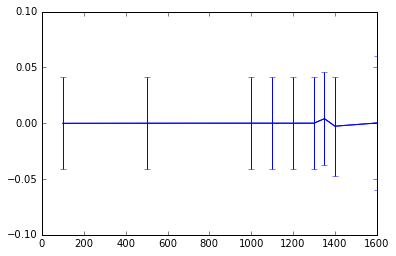

In [37]:
plot(freqs, ratios)
ylim(-0.1, 0.1)
errorbar(freqs,ratios,fmt='b-',yerr=err)